## Assignment 6 - Model Evaluation


In [ ]:
#!pip install jupyterthemes
#!jt -t chesterish

In [1]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing

# For data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
pd.__version__
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("C:\\Users\\Sushruth\\Downloads\\pima_indian_data.csv") #importing data


In [5]:
data.head() #data glimpse


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [6]:
data.info() # Data Type check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe() # describe data


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [8]:
data.count() #count of rows


Number  of times pregnant     768
Plasma glucose                768
Diastolic blood pressure      768
Triceps skinfold thickness    768
serum insulin                 768
Body mass index               768
Diabetes pedigree function    768
Age                           768
Class                         768
dtype: int64

In [9]:
data.nunique() # Check number of unique values


Number  of times pregnant      17
Plasma glucose                136
Diastolic blood pressure       47
Triceps skinfold thickness     51
serum insulin                 186
Body mass index               248
Diabetes pedigree function    517
Age                            52
Class                           2
dtype: int64

In [10]:
data.isnull().sum() #Number of NA values


Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

In [11]:
data.duplicated().sum() #to find duplicate rows


0

#### Oberservations :
- Data is clean with no duplicates and NA values .

- Data Types are as expected 



## Data Exploration

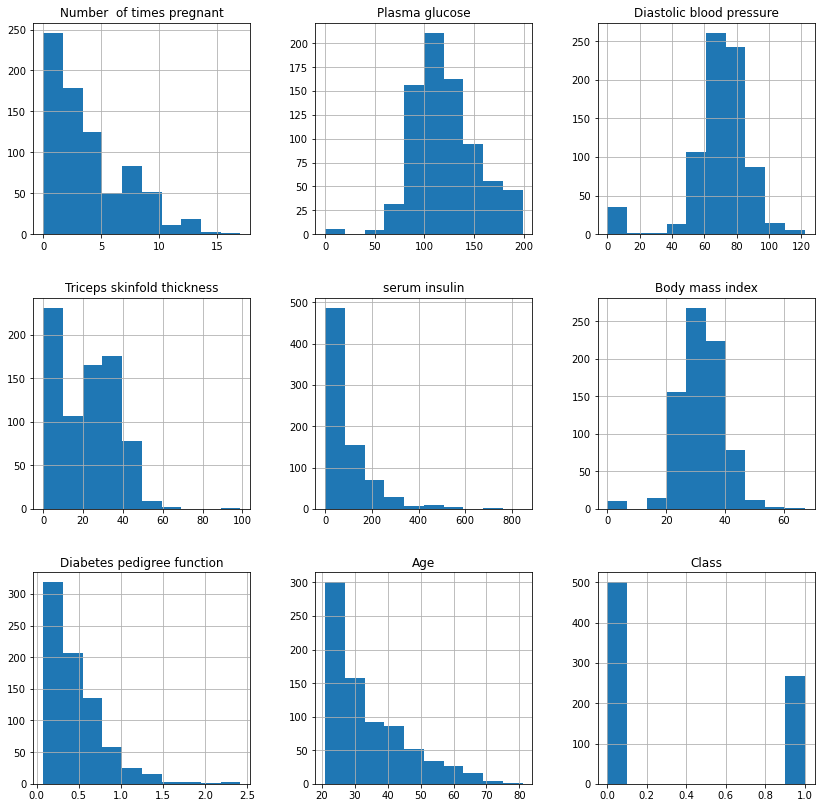

In [12]:
data.hist(figsize=(14,14))
plt.show()

#### Obeservations - 
-  I see that 'BMI Values are zero, Is that even possible ? Lets Check
- I see Blood Pressure is zero, Is that even possible ? Lets Check
- I don't see any abnormility in the data
- Few of the feature data is Left skewd, as they are from different scales, Need to implement Scalar Standardizatin function


#### Checking for BMI with 0 values,
- As this is not possible, the lowest ever recorded is 16.1.
- If there are any such records, I will go ahead and impute or delete them

In [37]:
data[data['Body mass index'] == 0].count()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

I will delete them, as the count is very less.


In [31]:
#data = data[data['Body mass index'] >= 0]
data.drop(data[data['Body mass index'] == 0].index, inplace = True)

#### Blood pressure with Zero
> Living person cannot have BP with 0  [Quora Link ](https://www.quora.com/It-is-possible-to-have-a-diastolic-pressure-of-zero)

In [34]:
data[data['Diastolic blood pressure'] ==  0].count()


Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

In [33]:
data.drop(data[data['Diastolic blood pressure'] == 0].index, inplace = True)

Text(0.5, 1.0, 'Outlier Analysis')

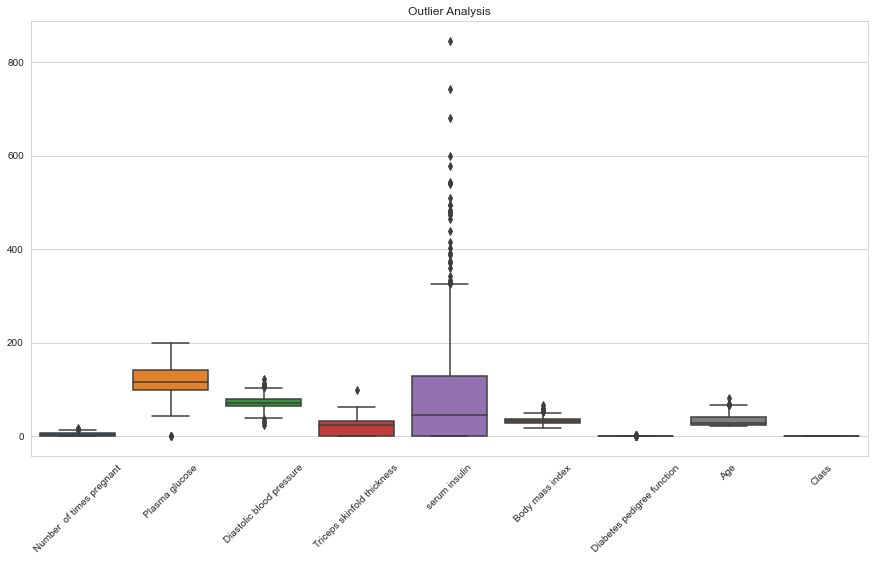

In [36]:
# Univariate distribution analysis
plt.subplots(figsize=(15, 8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Outlier Analysis')

Another reason why we need to scale the features, as the boxplots are of differnt sizes and variations

> The view is not clear enough to know , Lets try different method to view outliers

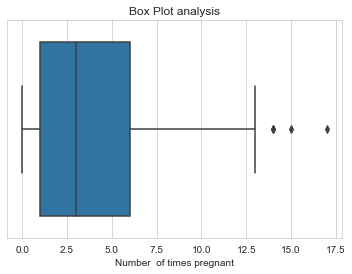

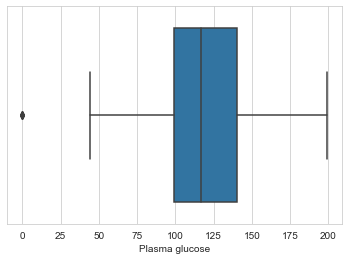

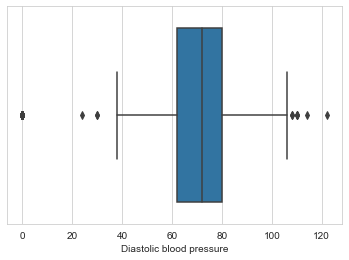

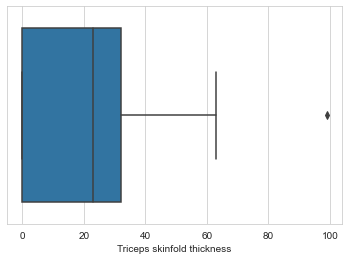

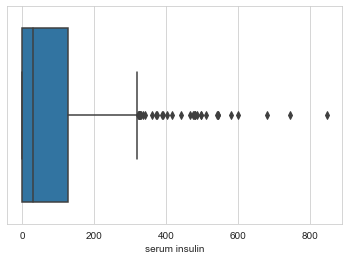

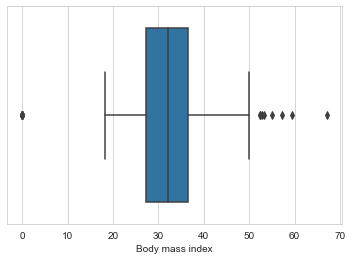

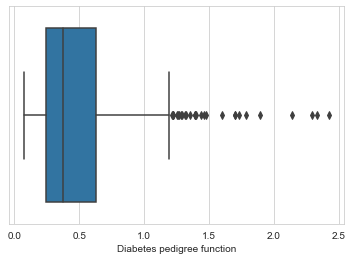

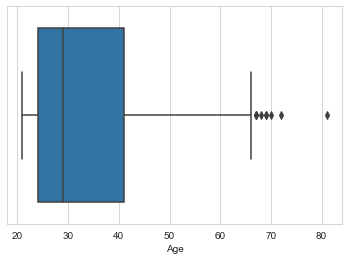

In [29]:
sns.set_style("whitegrid")
plt.title('Box Plot analysis')
sns.color_palette("pastel")
for col in data.columns:
    if col !='Class':
        sns.boxplot(data[col])
        plt.show()

#### Observations 
- Not many outliers for the features, most of the extreme outliers seems legid . 

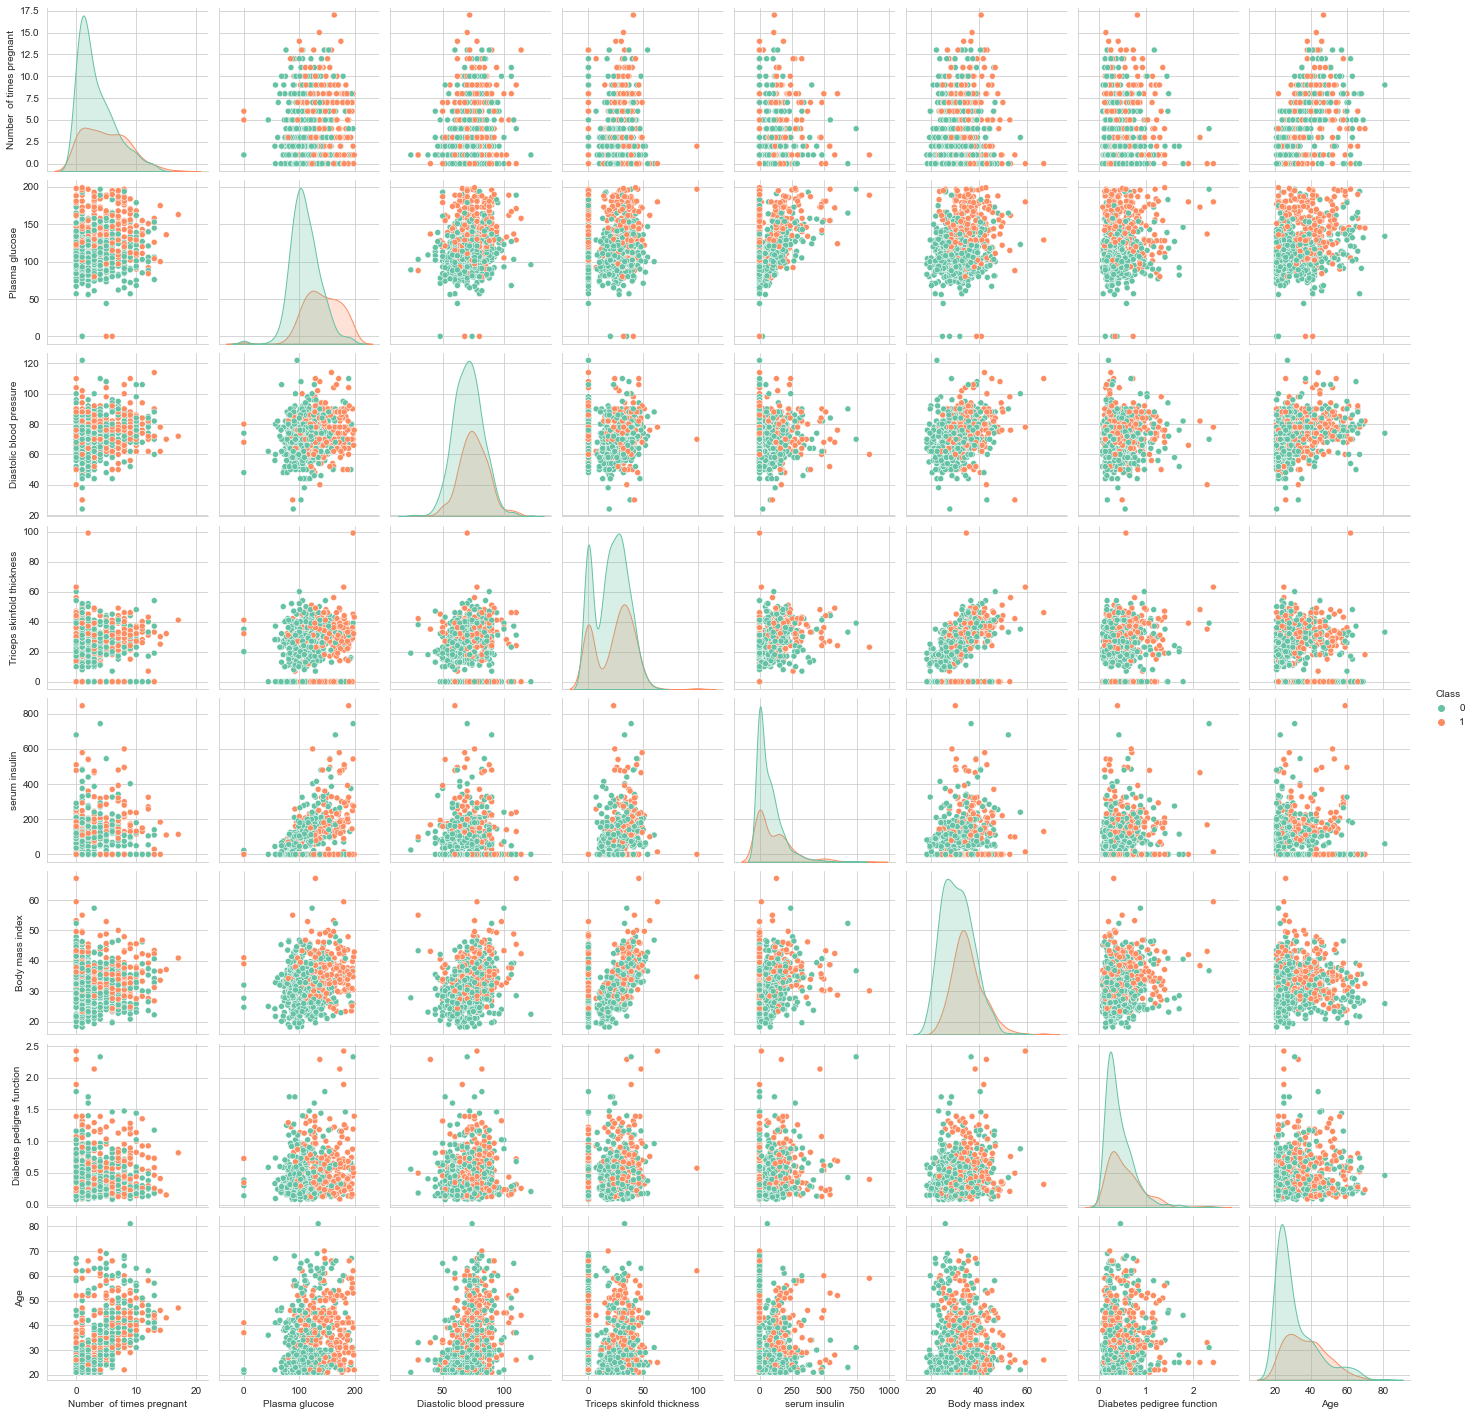

In [38]:
#Pairplot 
sns.pairplot(data,palette="Set2", diag_kind="kde", height=2.5,hue="Class")


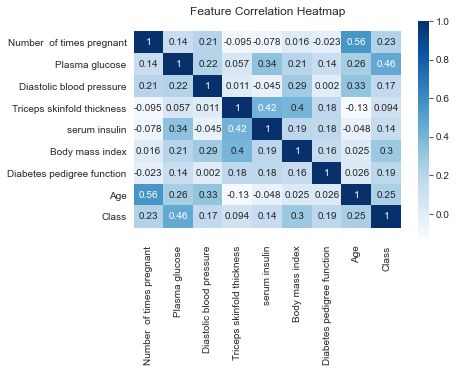

In [39]:
#Correlation

corr = data.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Not be able to create new features, as there is no meaning generated out of it



There are no significant correlations, with the exception of high correlation with glucose


## Creating Pipeline
- Split the data into training/test.
- Create feature processing pipeline.
 - Standardize features.
 -  Extract 5 PCA components. (arbitrary decision; could evaluate)
- Fit a Logistic Regression model.
- Evaluate accuracy (relatively balanced dataset so accuracy is okay).

> ##### Splitting the data into 30-70 set

In [79]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = data['Class']
    X = data[[x for x in data.columns if x != 'Class']]

    return train_test_split(X, y, test_size=0.3)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 510
Test examples: 219


##### Creating Pipeline
> -   There are no categorical variables, I wont be using One hot encoding
> -  I cant think of any creating new features, which add value to dataset
> -   I will consider PCA component of 4, as there are 8 features (as I see 2 to 3 correlated features)

  

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='l2',solver='liblinear'))
        ]
    )

    return modeling_pipeline

from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, X_train, y_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=10)
cv_results

{'fit_time': array([0.01598978, 0.01499152, 0.01499176, 0.01562953, 0.        ,
        0.01562357, 0.01562214, 0.01562381, 0.01562524, 0.01562524]),
 'score_time': array([0.02398658, 0.02898288, 0.01598978, 0.01561975, 0.03124762,
        0.01562572, 0.015625  , 0.        , 0.03125095, 0.01561904]),
 'test_accuracy': array([0.70588235, 0.88235294, 0.7254902 , 0.64705882, 0.76470588,
        0.70588235, 0.76470588, 0.70588235, 0.80392157, 0.66666667]),
 'test_recall': array([0.57894737, 0.78947368, 0.36842105, 0.38888889, 0.5       ,
        0.55555556, 0.55555556, 0.44444444, 0.61111111, 0.5       ]),
 'test_precision': array([0.61111111, 0.88235294, 0.77777778, 0.5       , 0.75      ,
        0.58823529, 0.71428571, 0.61538462, 0.78571429, 0.52941176]),
 'test_f1_macro': array([0.68191268, 0.87121212, 0.65540541, 0.59017857, 0.71666667,
        0.67377399, 0.72678571, 0.65243071, 0.77232143, 0.63027719]),
 'test_roc_auc': array([0.73519737, 0.87335526, 0.83717105, 0.72390572, 0.83670

#### Making Predictions and fitting the model

In [129]:

from sklearn.metrics import confusion_matrix

y_test_pred = m.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[123  28]
 [ 33  35]]


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.56      0.51      0.53        68

    accuracy                           0.72       219
   macro avg       0.67      0.66      0.67       219
weighted avg       0.72      0.72      0.72       219



In [131]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.7957732761978964

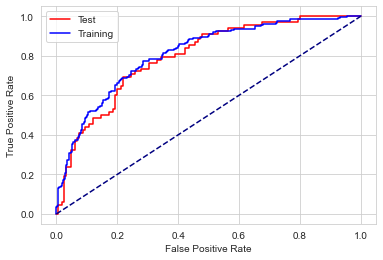

In [132]:

from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

Obeservations - 
- AUC is decent score.
- Train and test can be more narrower, when if outliers are imputed
- Precision and recall for 0 is okay,given the support is more  